#### First look at different models

In [45]:
# Set seed for reproducibility
SEED=1

# Instantiate lr
lr = LogisticRegression(max_iter=10000)

# Instate dtc

dtc = DecisionTreeClassifier(random_state=SEED)

# Instantiate knn
knn = KNeighborsClassifier()

# Instantiate lda

lda = LinearDiscriminantAnalysis(solver='svd')

# Instantiate gnb

gnb = GaussianNB()

#Instantiate svc

svc = SVC()

#Instantiate rfc

rfc = RandomForestClassifier(random_state=SEED)

# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('DecisionTreeClassifier',dtc), ('K Nearest Neighbours', knn), ('LinearDiscriminantAnalysis', lda),('GaussianNB',gnb),('SVC',svc),('RandomForestClassifier',rfc)]

In [46]:
# Iterate over the pre-defined list of classifiers
model_list = []
scaled_list = []
accuracy_list = []
cross_val_score_mean = []

# Fit clf to the training set

for clf_name, clf in classifiers:    
 
    clf.fit(X_train, y_train)
    
    model_list.append(clf_name)
    scaled_list.append(0)
    
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) 
    scores = cross_val_score(clf, X_train, y_train, cv=10)
    
    accuracy_list.append(np.round(accuracy,decimals=2))
    cross_val_score_mean.append(np.round(sum(scores)/len(scores),decimals=2))
    
#Evaluate clf's accuracy on scaled train dataset

for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train_scaled, y_train)
    
    model_list.append(clf_name)
    scaled_list.append(1)
    
    # Predict y_pred
    y_pred = clf.predict(X_test_scaled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) 
    
    scores = cross_val_score(clf, X_train_scaled, y_train, cv=10)
    accuracy_list.append(np.round(accuracy, decimals=2))
    cross_val_score_mean.append(np.round(sum(scores)/len(scores), decimals=2))
    
final_scoring_list = pd.DataFrame(np.column_stack([model_list, scaled_list, accuracy_list, cross_val_score_mean]), columns=['model', 'scaled', 'accuracy','mean_score_value'])
final_scoring_list['accuracy'] = pd.to_numeric(final_scoring_list['accuracy'])

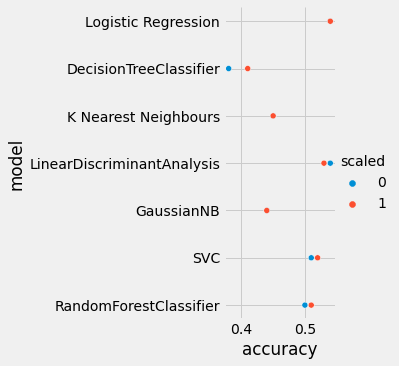

In [47]:
sns.relplot(
    data=final_scoring_list,
    x="accuracy", y="model",
    hue="scaled"
);

Better to use scaled dataset for models based on distances and the regular one on the decision tree ones. GausssianNB & KNN will be dismissed.

##### A) Decision Tree Classifier

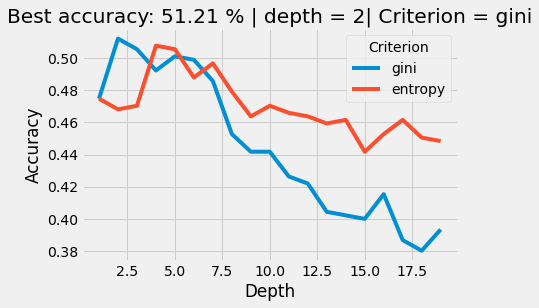

In [48]:
max_depth = 1
criterion = ['gini','entropy']
max_depth_results = []
criterion_results = []
accuracy_results = []

while max_depth <20:
    
    for item in criterion:
        dtc = DecisionTreeClassifier(criterion=item, max_depth=max_depth, random_state=1)
        dtc = dtc.fit(X_train, y_train)
        predictions = dtc.predict(X_test)
        max_depth_results.append(max_depth)
        criterion_results.append(item)
        accuracy_results.append(metrics.accuracy_score(y_test,predictions))
        
    max_depth +=1

total_results = pd.DataFrame(list(zip(max_depth_results, criterion_results, accuracy_results)),columns=['Depth','Criterion','Accuracy'])

dtc_max_acc = total_results[total_results['Accuracy'] == total_results.Accuracy.max()]

sns.lineplot(x="Depth", y="Accuracy",
             hue="Criterion",
             data=total_results).set_title('Best accuracy: ' + str(np.round(dtc_max_acc.iloc[0,2]  * 100, 2)) + ' % | depth = ' + str(dtc_max_acc.iloc[0,0]) +'| Criterion = '+ dtc_max_acc.iloc[0,1]);

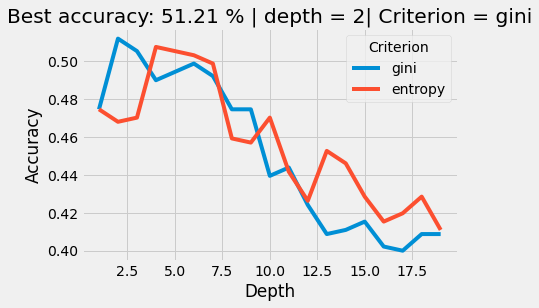

In [49]:
max_depth = 1
criterion = ['gini','entropy']
max_depth_results = []
criterion_results = []
accuracy_results = []

while max_depth <20:
    
    for item in criterion:
        dtc = DecisionTreeClassifier(criterion=item, max_depth=max_depth, random_state=1)
        dtc = dtc.fit(X_train_scaled, y_train)
        predictions_scaled = dtc.predict(X_test_scaled)
        max_depth_results.append(max_depth)
        criterion_results.append(item)
        accuracy_results.append(metrics.accuracy_score(y_test,predictions_scaled))
        
    max_depth +=1

total_results = pd.DataFrame(list(zip(max_depth_results, criterion_results, accuracy_results)),columns=['Depth','Criterion','Accuracy'])

dtc_max_acc = total_results[total_results['Accuracy'] == total_results.Accuracy.max()]

sns.lineplot(x="Depth", y="Accuracy",
             hue="Criterion",
             data=total_results).set_title('Best accuracy: ' + str(np.round(dtc_max_acc.iloc[0,2]  * 100, 2)) + ' % | depth = ' + str(dtc_max_acc.iloc[0,0]) +'| Criterion = '+ dtc_max_acc.iloc[0,1]);

###### Applying model with the best parameters

In [50]:
dtc = DecisionTreeClassifier(criterion='gini',max_depth=2, random_state=1)
dtc.fit(X_train, y_train)
predictions_dtc = dtc.predict(X_test)
predictions_prob_dtc = dtc.predict_proba(X_test)
predictions_dtc_all = dtc.predict(features)
predictions_prob_dtc_all = dtc.predict_proba(features)

##### Decision Tree Classifier - Features

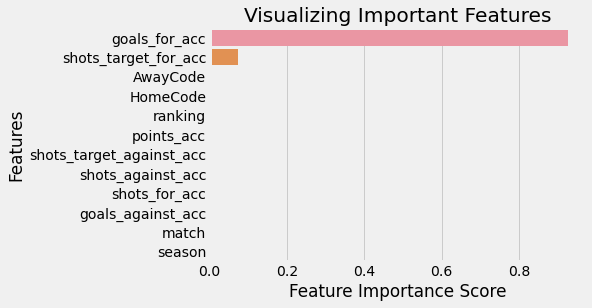

In [51]:
feature_imp = pd.Series(dtc.feature_importances_,index=X_train.columns).sort_values(ascending=False)
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show();

#### B) Random Forest Classifier

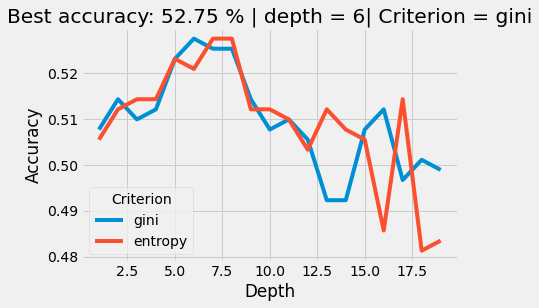

In [52]:
max_depth = 1
criterion = ['gini','entropy']
max_depth_results = []
criterion_results = []
accuracy_results = []

while max_depth <20:
    
    for item in criterion:
        rfc = RandomForestClassifier(criterion=item, max_depth=max_depth, random_state=1)
        rfc = rfc.fit(X_train, y_train)
        predictions = rfc.predict(X_test)
        max_depth_results.append(max_depth)
        criterion_results.append(item)
        accuracy_results.append(metrics.accuracy_score(y_test,predictions))
        
    max_depth +=1

total_results = pd.DataFrame(list(zip(max_depth_results, criterion_results, accuracy_results)),columns=['Depth','Criterion','Accuracy'])

rfc_max_acc = total_results[total_results['Accuracy'] == total_results.Accuracy.max()]

sns.lineplot(x="Depth", y="Accuracy",
             hue="Criterion",
             data=total_results).set_title('Best accuracy: ' + str(np.round(rfc_max_acc.iloc[0,2]  * 100, 2)) + ' % | depth = ' + str(rfc_max_acc.iloc[0,0]) +'| Criterion = '+ rfc_max_acc.iloc[0,1]);

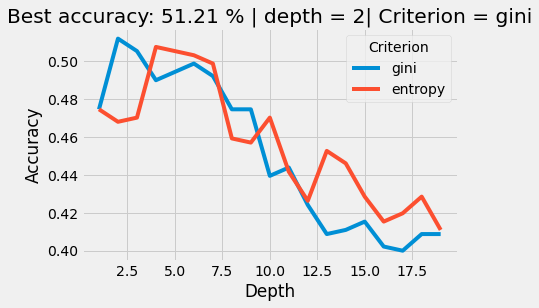

In [53]:
max_depth = 1
criterion = ['gini','entropy']
max_depth_results = []
criterion_results = []
accuracy_results = []

while max_depth <20:
    
    for item in criterion:
        rfc = DecisionTreeClassifier(criterion=item, max_depth=max_depth, random_state=1)
        rfc = rfc.fit(X_train_scaled, y_train)
        predictions_scaled = rfc.predict(X_test_scaled)
        max_depth_results.append(max_depth)
        criterion_results.append(item)
        accuracy_results.append(metrics.accuracy_score(y_test,predictions_scaled))
        
    max_depth +=1

total_results = pd.DataFrame(list(zip(max_depth_results, criterion_results, accuracy_results)),columns=['Depth','Criterion','Accuracy'])

rfc_max_acc = total_results[total_results['Accuracy'] == total_results.Accuracy.max()]

sns.lineplot(x="Depth", y="Accuracy",
             hue="Criterion",
             data=total_results).set_title('Best accuracy: ' + str(np.round(rfc_max_acc.iloc[0,2]  * 100, 2)) + ' % | depth = ' + str(rfc_max_acc.iloc[0,0]) +'| Criterion = '+ rfc_max_acc.iloc[0,1]);

##### Applying model with the best parameters

In [54]:
rfc = RandomForestClassifier(criterion='gini',max_depth=6, random_state=1)
rfc.fit(X_train, y_train)
predictions_rfc = rfc.predict(X_test)
predictions_prob_rfc = rfc.predict_proba(X_test)
predictions_rfc_all = rfc.predict(features)
predictions_prob_rfc_all = rfc.predict_proba(features)

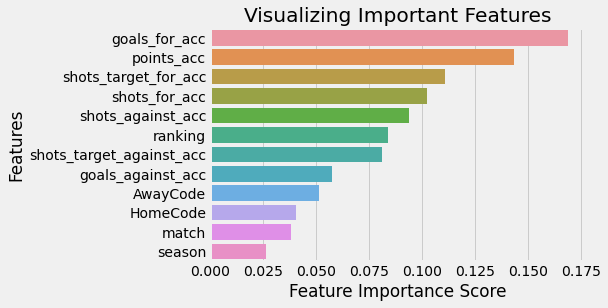

In [55]:
feature_imp = pd.Series(rfc.feature_importances_,index=X_train.columns).sort_values(ascending=False)
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

#### C) Logistic Regression

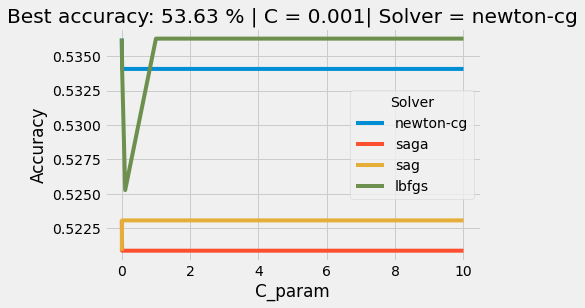

In [56]:
C_param_range = [0.001,0.01,0.1,1,10]
solver = ['newton-cg','saga','sag','lbfgs']
C_param_result = []
solver_results = []
accuracy_results = []


for i in C_param_range:
    
    for item in solver:
        
        lr = LogisticRegression(penalty='l2',solver=item, multi_class = 'multinomial', max_iter=10000,random_state=42,C=i)
        lr = lr.fit(X_train, y_train)
        predictions = lr.predict(X_test)
        C_param_result.append(i)
        solver_results.append(item)
        accuracy_results.append(metrics.accuracy_score(y_test,predictions))
        

total_results = pd.DataFrame(list(zip(C_param_result,solver_results, accuracy_results)),columns=['C_param','Solver','Accuracy'])

lr_max_acc = total_results[total_results['Accuracy'] == total_results.Accuracy.max()]

sns.lineplot(x="C_param", y="Accuracy",
             hue="Solver",
             data=total_results).set_title('Best accuracy: ' + str(np.round(lr_max_acc.iloc[0,2]  * 100, 2)) + ' % | C = ' + str(lr_max_acc.iloc[0,0]) +'| Solver = '+ lr_max_acc.iloc[0,1]);

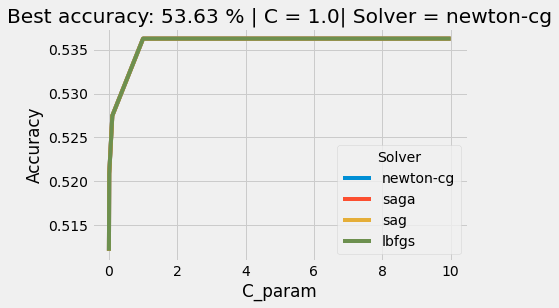

In [57]:
C_param_range = [0.001,0.01,0.1,1,10]
solver = ['newton-cg','saga','sag','lbfgs']
C_param_result = []
solver_results = []
accuracy_results = []


for i in C_param_range:
    
    for item in solver:
        
        lr = LogisticRegression(penalty='l2',solver=item, multi_class = 'multinomial', max_iter=10000,random_state=42,C=i)
        lr = lr.fit(X_train_scaled, y_train)
        predictions_scaled = lr.predict(X_test_scaled)
        C_param_result.append(i)
        solver_results.append(item)
        accuracy_results.append(metrics.accuracy_score(y_test,predictions_scaled))
        

total_results = pd.DataFrame(list(zip(C_param_result,solver_results, accuracy_results)),columns=['C_param','Solver','Accuracy'])

lr_max_acc = total_results[total_results['Accuracy'] == total_results.Accuracy.max()]

sns.lineplot(x="C_param", y="Accuracy",
             hue="Solver",
             data=total_results).set_title('Best accuracy: ' + str(np.round(lr_max_acc.iloc[0,2]  * 100, 2)) + ' % | C = ' + str(lr_max_acc.iloc[0,0]) +'| Solver = '+ lr_max_acc.iloc[0,1]);

##### Applying model with the best parameters

In [58]:
lr = LogisticRegression(penalty='l2',solver='newton-cg', multi_class = 'multinomial', max_iter=10000,random_state=42,C=0.001)
lr = lr.fit(X_train, y_train)
predictions_lr = lr.predict(X_test)
predictions_prob_lr = lr.predict_proba(X_test)
predictions_lr_all = lr.predict(features)
predictions_prob_lr_all = lr.predict_proba(features)

#### D) K-Neighbors Classifier

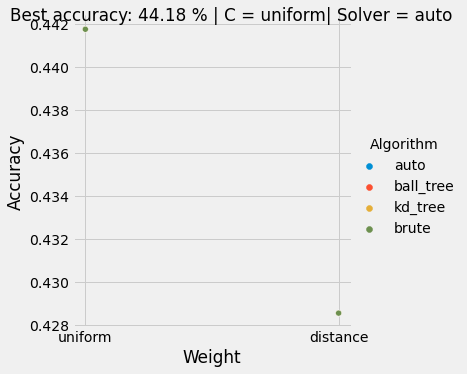

In [59]:
weights = ['uniform','distance']
algorithm = ['auto','ball_tree','kd_tree','brute']
weights_results = []
algorithm_results = []
accuracy_results = []


for i in weights:
    
    for item in algorithm:
        
        knc = KNeighborsClassifier(n_neighbors=3,weights=i,algorithm = item)
        knc = knc.fit(X_train, y_train)
        predictions = knc.predict(X_test)
        weights_results.append(i)
        algorithm_results.append(item)
        accuracy_results.append(metrics.accuracy_score(y_test,predictions))
        

total_results = pd.DataFrame(list(zip(weights_results,algorithm_results, accuracy_results)),columns=['Weight','Algorithm','Accuracy'])

knc_max_acc = total_results[total_results['Accuracy'] == total_results.Accuracy.max()]

knc_plot = sns.relplot(x="Weight", y="Accuracy",
             hue="Algorithm",
             data=total_results)

knc_plot.fig.suptitle('Best accuracy: ' + str(np.round(knc_max_acc.iloc[0,2]  * 100, 2)) + ' % | C = ' + str(knc_max_acc.iloc[0,0]) +'| Solver = '+ knc_max_acc.iloc[0,1]);



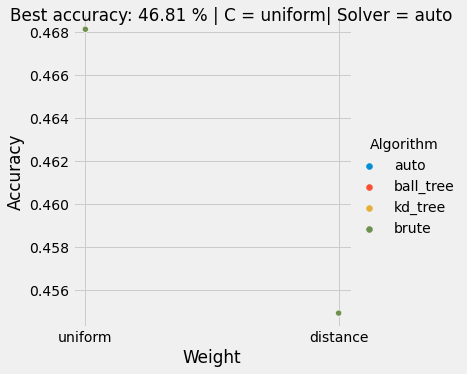

In [60]:
weights = ['uniform','distance']
algorithm = ['auto','ball_tree','kd_tree','brute']
weights_results = []
algorithm_results = []
accuracy_results = []


for i in weights:
    
    for item in algorithm:
        
        knc = KNeighborsClassifier(n_neighbors=3,weights=i,algorithm = item)
        knc = knc.fit(X_train_scaled, y_train)
        predictions_scaled = knc.predict(X_test_scaled)
        weights_results.append(i)
        algorithm_results.append(item)
        accuracy_results.append(metrics.accuracy_score(y_test,predictions_scaled))
        

total_results = pd.DataFrame(list(zip(weights_results,algorithm_results, accuracy_results)),columns=['Weight','Algorithm','Accuracy'])

knc_max_acc = total_results[total_results['Accuracy'] == total_results.Accuracy.max()]

knc_plot = sns.relplot(x="Weight", y="Accuracy",
             hue="Algorithm",
             data=total_results)

knc_plot.fig.suptitle('Best accuracy: ' + str(np.round(knc_max_acc.iloc[0,2]  * 100, 2)) + ' % | C = ' + str(knc_max_acc.iloc[0,0]) +'| Solver = '+ knc_max_acc.iloc[0,1]);

This model won't be considered for having an accuracy 7pp lower than the previous ones

#### E) Linear Discriminant Analysis

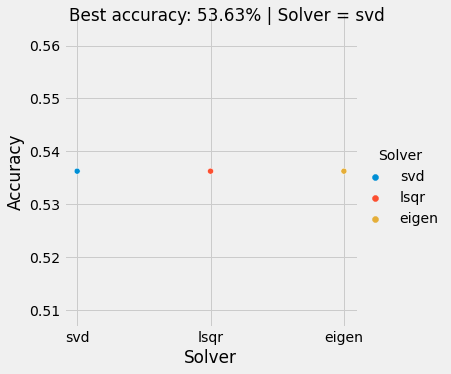

In [61]:
solvers = ['svd','lsqr','eigen']
solvers_results = []
accuracy_results = []

    
for item in solvers:
        
    lda = LinearDiscriminantAnalysis(solver = item)
    lda = lda.fit(X_train, y_train)
    predictions = lda.predict(X_test)
    solvers_results.append(item)
    accuracy_results.append(metrics.accuracy_score(y_test,predictions))

total_results = pd.DataFrame(list(zip(solvers_results, accuracy_results)),columns=['Solver','Accuracy'])

lda_max_acc = total_results[total_results['Accuracy'] == total_results.Accuracy.max()]

lda_plot = sns.relplot(x="Solver", y="Accuracy",
             hue="Solver",
             data=total_results)
lda_plot.fig.suptitle('Best accuracy: ' + str(np.round(lda_max_acc.iloc[0,1]  * 100, 2)) +'% | Solver = '+ lda_max_acc.iloc[0,0]);



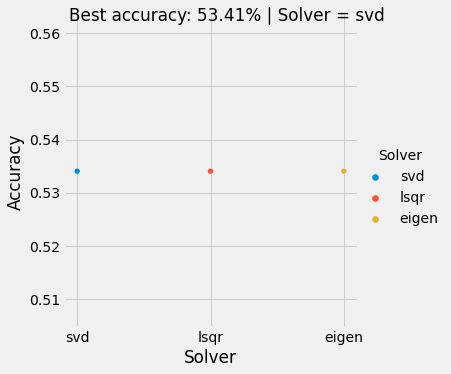

In [62]:
solvers = ['svd','lsqr','eigen']
solvers_results = []
accuracy_results = []

    
for item in solvers:
        
    lda = LinearDiscriminantAnalysis(solver = item)
    lda = lda.fit(X_train_scaled, y_train)
    predictions_scaled = lda.predict(X_test_scaled)
    solvers_results.append(item)
    accuracy_results.append(metrics.accuracy_score(y_test,predictions_scaled))

total_results = pd.DataFrame(list(zip(solvers_results, accuracy_results)),columns=['Solver','Accuracy'])

lda_max_acc = total_results[total_results['Accuracy'] == total_results.Accuracy.max()]

lda_plot = sns.relplot(x="Solver", y="Accuracy",
             hue="Solver",
             data=total_results)

lda_plot.fig.suptitle('Best accuracy: ' + str(np.round(lda_max_acc.iloc[0,1]  * 100, 2)) +'% | Solver = '+ lda_max_acc.iloc[0,0]);

##### Applying model with the best parameters

In [63]:
lda = LinearDiscriminantAnalysis(solver='svd')
lda = lda.fit(X_train, y_train)
predictions_lda = lda.predict(X_test)
predictions_prob_lda = lda.predict_proba(X_test)
predictions_lda_all = lda.predict(features)
predictions_prob_lda_all = lda.predict_proba(features)

#### F) SVC

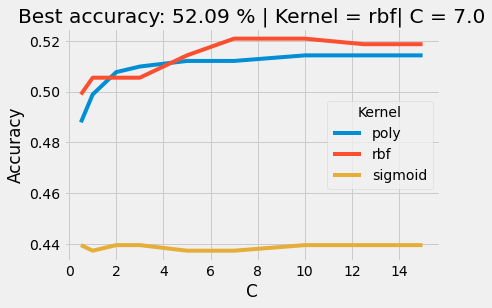

In [64]:
kernel = ['poly', 'rbf', 'sigmoid']
c_list = [0.5,1.0,2.0,3.0,5.0,7.0,10.0,12.5,15.0]
kernel_results = []
c_results = []
accuracy_results = []


for c in c_list:
    
    for item in kernel:
        
        svc = SVC(kernel = item, C = c)
        svc = svc.fit(X_train, y_train)
        predictions_svc = svc.predict(X_test)
        kernel_results.append(item)
        c_results.append(c)
        accuracy_results.append(metrics.accuracy_score(y_test,predictions_svc))
        

total_results = pd.DataFrame(list(zip(kernel_results, c_results, accuracy_results)),columns=['Kernel','C','Accuracy'])

svc_max_acc = total_results[total_results['Accuracy'] == total_results.Accuracy.max()]

sns.lineplot(x="C", y="Accuracy",hue="Kernel",data=total_results)

plt.title('Best accuracy: ' + str(np.round(svc_max_acc.iloc[0,2]  * 100, 2)) + ' % | Kernel = ' + str(svc_max_acc.iloc[0,0]) +'| C = '+ str(np.round(svc_max_acc.iloc[0,1])));

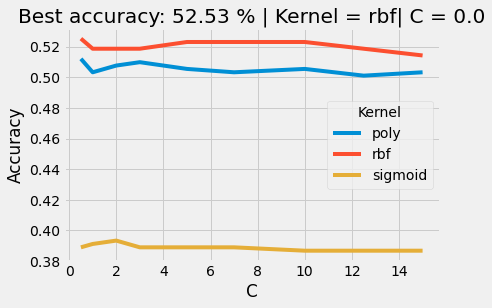

In [65]:
kernel = ['poly', 'rbf', 'sigmoid']
c_list = [0.5,1.0,2.0,3.0,5.0,7.0,10.0,12.5,15.0]
kernel_results = []
c_results = []
accuracy_results = []


for c in c_list:
    
    for item in kernel:
        
        svc = SVC(kernel = item, C = c)
        svc = svc.fit(X_train_scaled, y_train)
        predictions_svc = svc.predict(X_test_scaled)
        kernel_results.append(item)
        c_results.append(c)
        accuracy_results.append(metrics.accuracy_score(y_test,predictions_svc))
        

total_results = pd.DataFrame(list(zip(kernel_results, c_results, accuracy_results)),columns=['Kernel','C','Accuracy'])

svc_max_acc = total_results[total_results['Accuracy'] == total_results.Accuracy.max()]

sns.lineplot(x="C", y="Accuracy",hue="Kernel",data=total_results)

plt.title('Best accuracy: ' + str(np.round(svc_max_acc.iloc[0,2]  * 100, 2)) + ' % | Kernel = ' + str(svc_max_acc.iloc[0,0]) +'| C = '+ str(np.round(svc_max_acc.iloc[0,1])));

##### Applying model with the best parameters

In [66]:
svc = SVC(kernel = 'rbf', C = 7.0, probability=True)
svc = svc.fit(X_train, y_train)
predictions_svc = svc.predict(X_test)
predictions_prob_svc = svc.predict_proba(X_test)
predictions_svc_all = svc.predict(features)
predictions_prob_svc_all = svc.predict_proba(features)